
### Aprendizaje Supervisado y No Supervisado
---
## Introduccion:

El cáncer de mama es uno de los tipos de cáncer más comunes en todo el mundo, el diagnóstico temprano es fundamental para su tratamiento exitoso, En este trabajo se generan modelos de predicción basados en aprendizaje automático para clasificar imágenes digitalizadas de masas mamarias en dos categorías: benigna o maligna. En particular, se comparan modelos de regresión logística, árboles de decisión, y modelos de conjunto, como Random Forest. Además, se utilizarán técnicas de validación cruzada y métricas de evaluación de modelos para evaluar y comparar el rendimiento de cada modelo.

---
##Contenido del Notebook:

*   Conjunto de Datos
 *   Librerías Relevantes
*   Análisis Descriptivo
*   Modelos de Aprendizaje
 *   Validación Cruzada K-fold
 *   Regresión Logístico
 *   Árboles de Clasificación
 *   Naive Bayes con Kernel Gaussiano
 *   Clasificación con kNN
 *   Evaluación de Métrica de Desempeño para Validación Cruzada
*   Balanceo de Datos: Undersampling y Oversampling
*   Clusterización con kNN
 *   Reducción de Dimensionalidad con PCA para Visualización




---
## **1. Conjunto de Datos**
**Data Set:** *Breast Cancer Wisconsin (Diagnostic)*
 <img style="float: left; padding-right: 150px; width: 190px" src="https://www.genengnews.com/wp-content/uploads/2022/09/Nov19_2020_Getty_1201440632_CancerCell-scaled.jpg"> 
**Data Set Information:** Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link].
**Descripión de Atributos:**
-   `ID number` -​ número de identificación único para cada imagen.
-   `Diagnosis` -​ variable de respuesta binaria que indica si la imagen corresponde a un tumor benigno (B) o maligno (M).
-   `radius` -​ radio medio de las células.
-   `texture` -​ desviación estándar de los valores de escala de grises.
-   `perimeter` -​ perímetro promedio de las células.
-   `area` - área promedio de las células.
-   `smoothness ` -​ variación local en las longitudes de radio. 
-   `compactness` - medida de la forma de la célula.
-   `concavity` - gravedad de las porciones cóncavas del contorno.
-   `concave points` -​ número de porciones cóncavas del contorno.
-   `symmetry` ​- simetría media de la célula.
-   `fractal dimension` ​- medida de la complejidad de la frontera de la célula. 
-   `radius`   -   radio del.
-   `texture` ​  -   standard deviation of gray-scale values.
-   `perimeter`
-   `area`
-   `smoothness` ​  -   Local variation in radius lengths.
-   `compactness` ​  -   Perimeter^2 / area.
-   `concavity` ​  -   Severity of concave portions of the contour.
-   `concave points` ​  -   Number of concave portions of the contour.
-   `symmetry`
-   `fractal dimension` ​  -   coastline approximation.


**Data Set Creators:**

1. Dr. William H. Wolberg, General Surgery Dept. University of Wisconsin, Clinical Sciences Center. Madison, WI 53792. wolberg@eagle.surgery.wisc.edu

2. W. Nick Street, Computer Sciences Dept. University of Wisconsin, 1210 West Dayton St., Madison, WI 53706. street@cs.wisc.edu 608-262-6619

3. Olvi L. Mangasarian, Computer Sciences Dept. University of Wisconsin, 1210 West Dayton St., Madison, WI 53706. olvi@cs.wisc.edu

2. OBJETIVOS
Este Notebook tiene como objetivo mostrar cómo los modelos de predicción pueden ser aplicados a
problemas médicos y ayudar en la toma de decisiones clínicas. Los resultados del análisis descriptivo
y de la aplicación de los modelos de aprendizaje se presentarán y se discutirá para así determinar el
modelo más óptimo para el diagnóstico.
3. OBJETIVOS ESPECÍFICOS
● Identificar mediante validación cruzada el modelo con mejor métrica de desempeño
(accuracy).
● Comprobar si para el modelo seleccionado existen cambios sensibles al balancear la muestra
inicial con metodologías Undersampling y Oversampling
● Generar una clusterización del conjunto de datos y presentar visualizaciones de tales grupos
con sus centroides.

### **1.1 Librerías Relevantes**

In [ ]:
### Importando Librerías Base
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Importando Librerías para Visualización
import matplotlib.pyplot as plt 
import matplotlib
font = {'size': 14}
matplotlib.rc('font',**font)
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

### Importando Librerías para Modelación
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

---
## **2. Análisis Descriptivo**

In [ ]:
### Se carga el dataset con 33 columnas iniciales
data = pd.read_csv('/content/data.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

En las primeras líneas del código, se carga el dataset en un objeto de tipo Pandas DataFrame y se
presenta una vista previa de los primeros registros utilizando el método "head()". Luego, se utiliza el
método "info()" para obtener información sobre las columnas disponibles, sus tipos de datos y la
cantidad de registros no nulos.

In [ ]:
### Listando las columnas disponibles, sus tipos de datos y registros no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
### Indicadores de estadística descriptiva para cada columna disponible.
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

<h3> A continuación, se utilizan los métodos "describe()" y "corr()" para obtener estadísticas descriptivas
y una matriz de correlación de las variables numéricas del conjunto de datos, respectivamente. Para
visualizar la matriz de correlación, se utiliza el paquete Seaborn para generar un mapa de calor.<h3>

In [ ]:
### No se encuentran datos vacíos ni registros que eliminar o corregir.
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

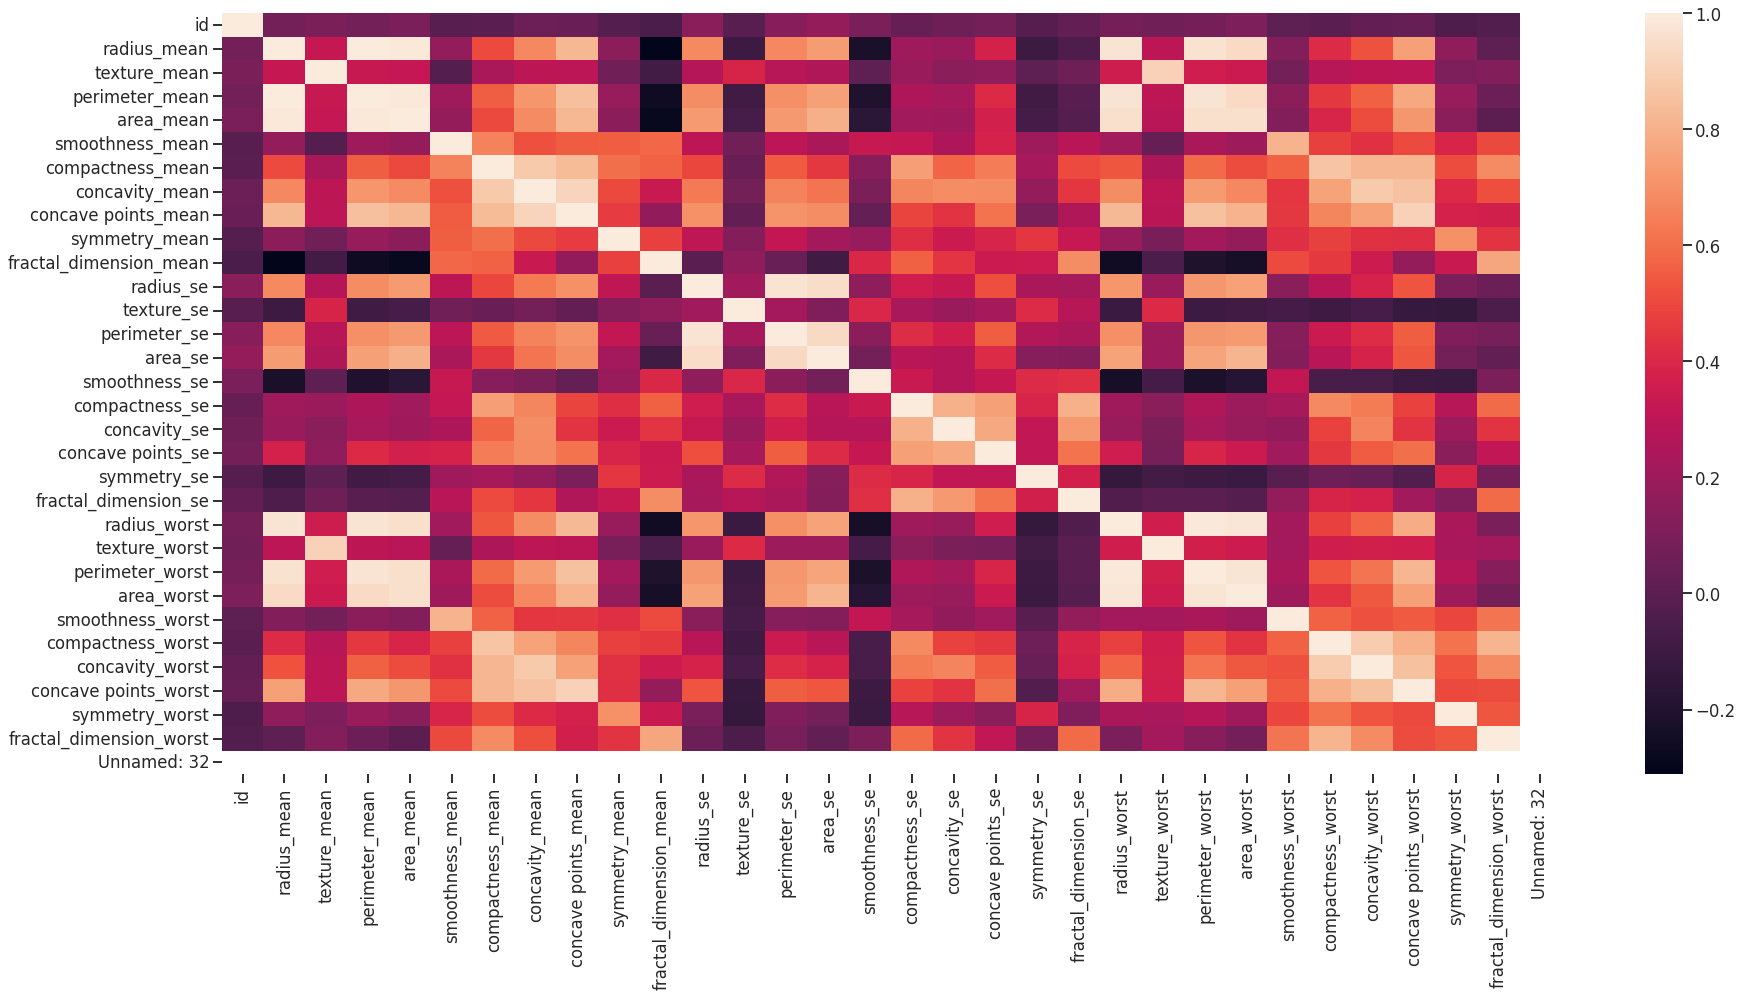

In [ ]:
### Se presenta la matriz de correlación representada en un mapa de calor. 
analisiscorr = data.corr()
plt.figure(figsize=(30,14))
sns.heatmap(analisiscorr)

<h3> Posteriormente, se genera un nuevo conjunto de datos llamado "data1" que incluye solo las
columnas relevantes sugeridas por el autor, y se elimina la columna "id". Además, se crea una lista
llamada "diagnosis" que contiene sólo los datos de la columna "diagnosis".<h3>

In [ ]:
### Generamos un dataset reducido con las columnas útiles sugeridas por el autor..
data1 = data[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [ ]:
data1.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

In [ ]:
data1.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  
count     569.000000              569.000000  
mean        0.181162                0.062798  
std         0.027414                0.007060  
min         0.106000                0.049960  
25%         0.161900                0.057700  
50%         0.179200                0.061540  
75%         0.195700                0.066120  
max         0.304000                0.097440

In [ ]:
### Se crea una lista de solo los datos de diagnosis
diagnosis = data['diagnosis']

In [ ]:
data1.drop(['id'],axis=1,inplace=True)

<h3> Finalmente, se utiliza la función "pairplot" de Seaborn para generar una matriz de gráficos que
muestra las correlaciones entre las variables numéricas del conjunto de datos y sus respectivas líneas
de densidad, utilizando el argumento "hue" para representar la variable "diagnosis" en diferentes
colores. Este tipo de gráfico permite visualizar de manera efectiva las relaciones entre diferentes
variables, lo que puede ser útil para la identificación de patrones y relaciones entre las variables del
conjunto de datos <h3>

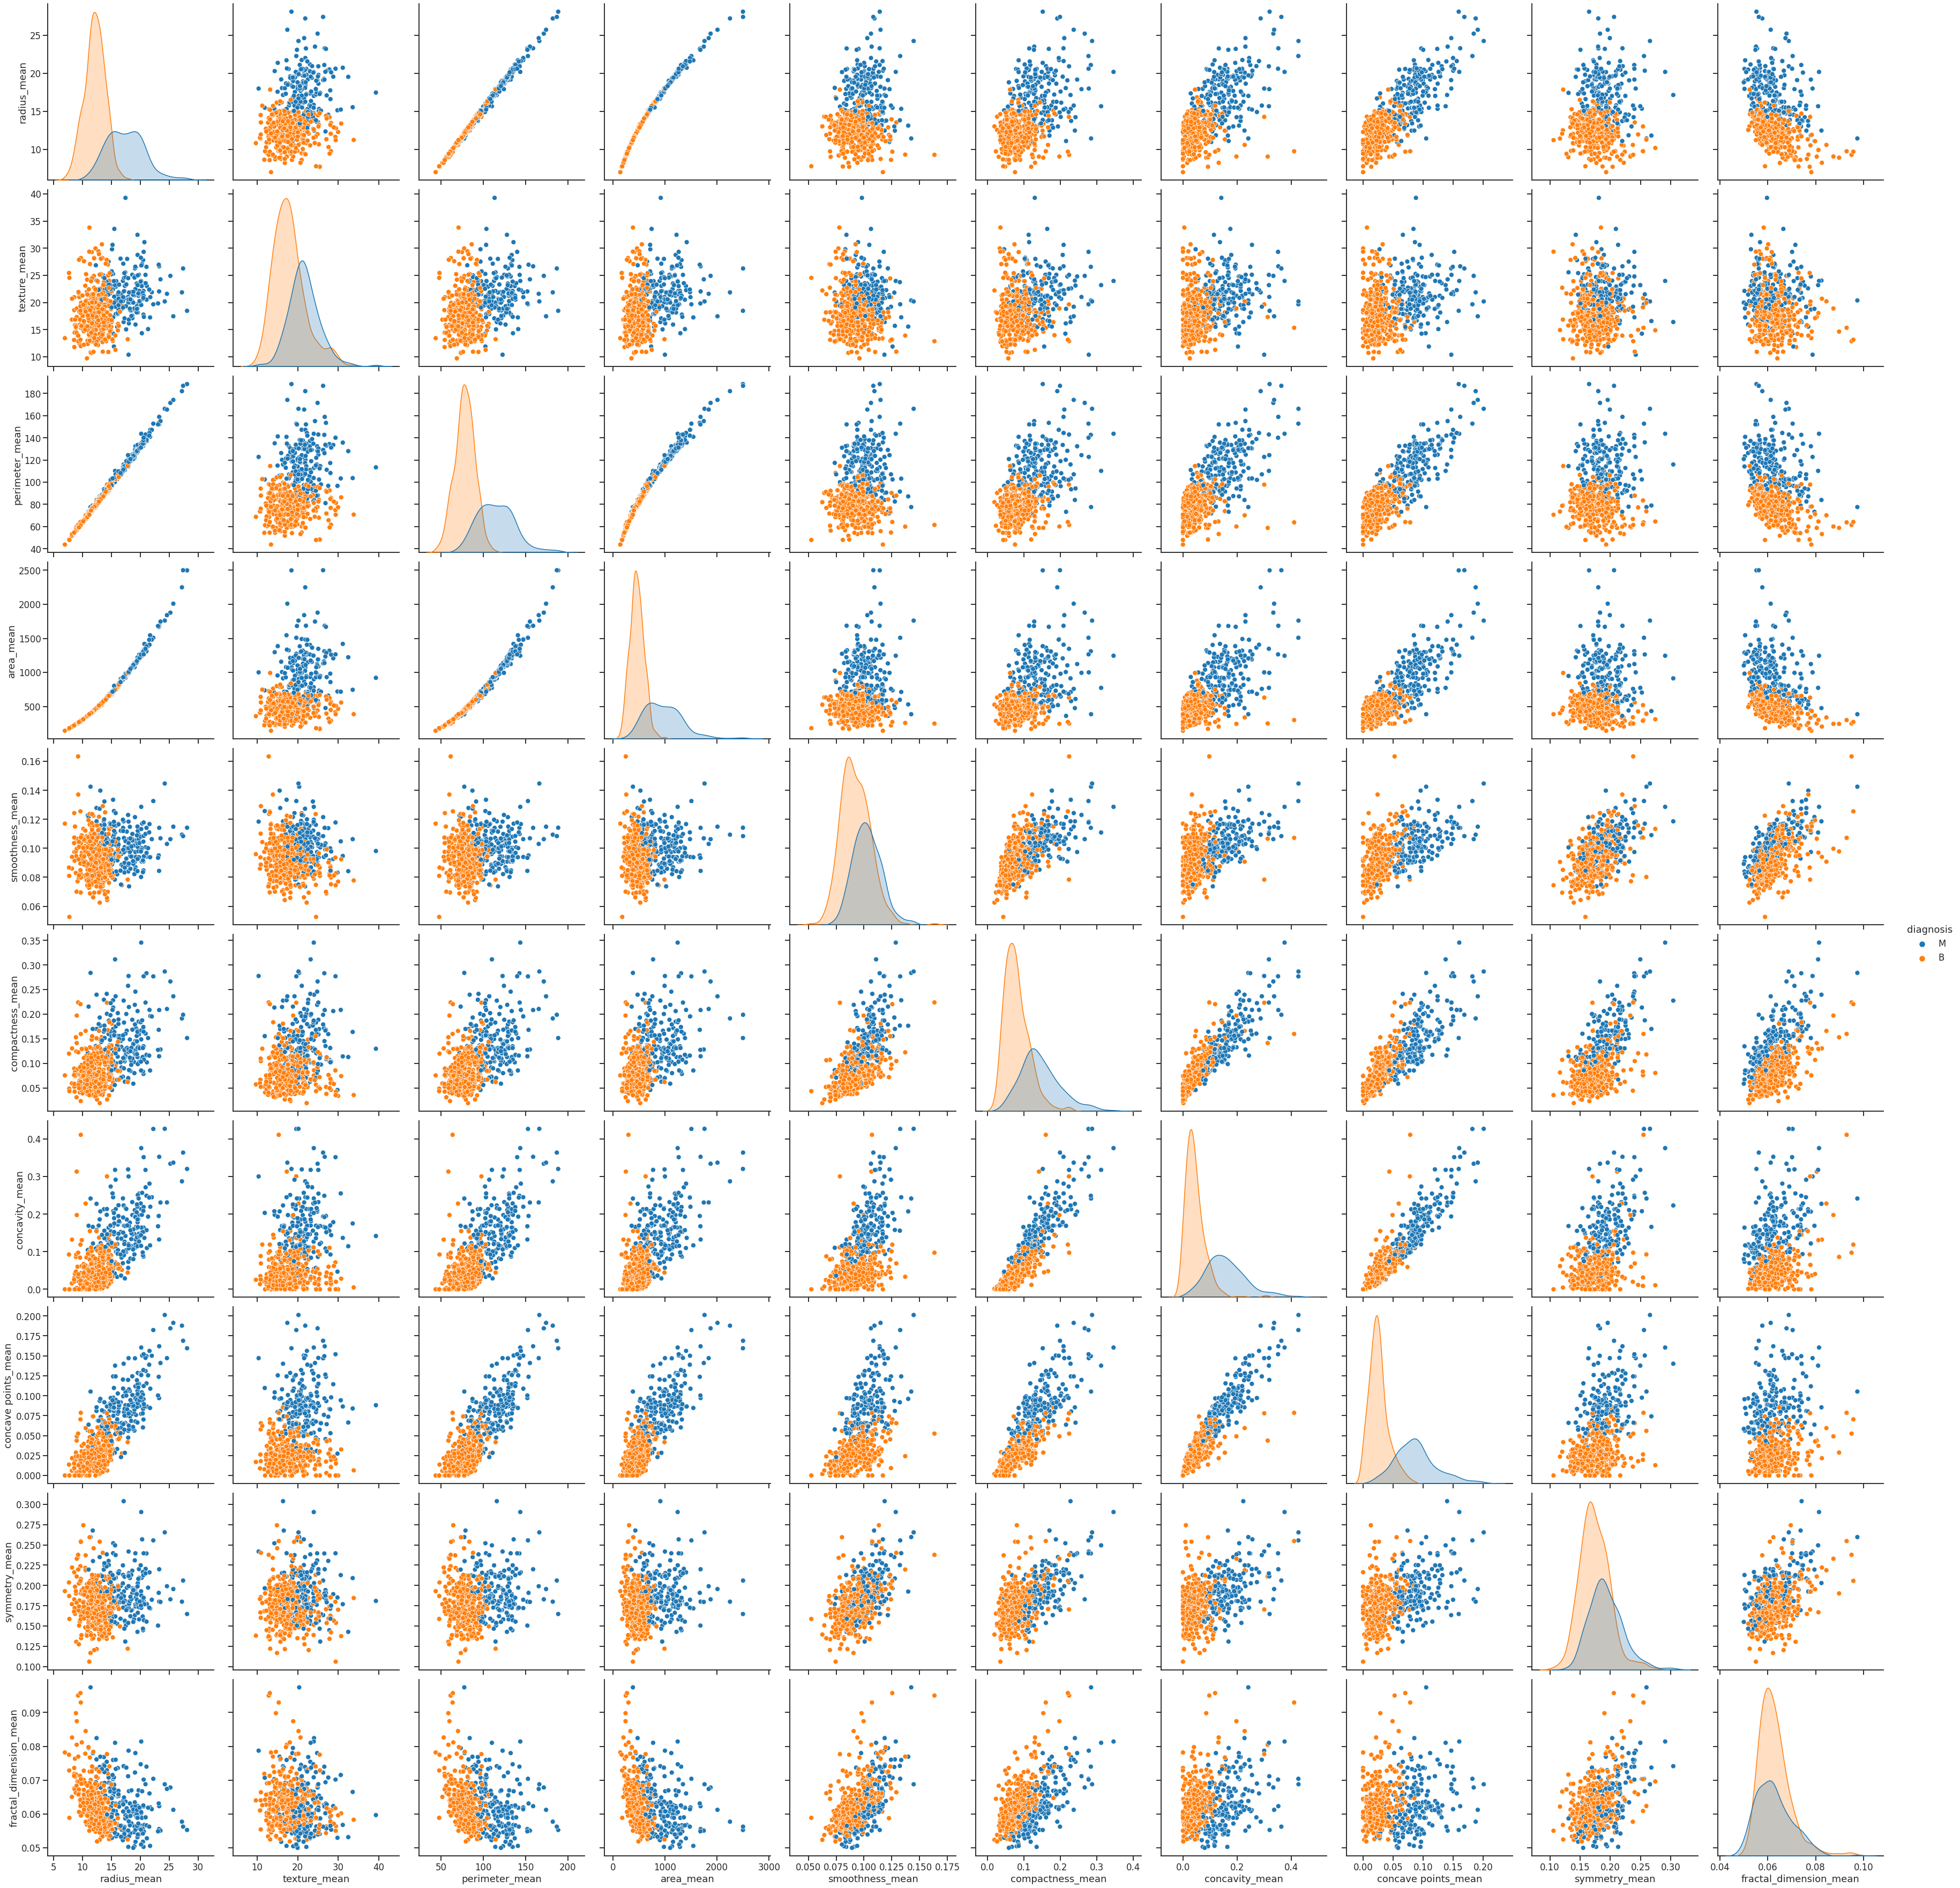

In [ ]:
### Se presenta una matriz de gráficos representando las correlaciones entre variables y su linea de densidad.
sns.pairplot(data1, hue = 'diagnosis',height=5, aspect=1)

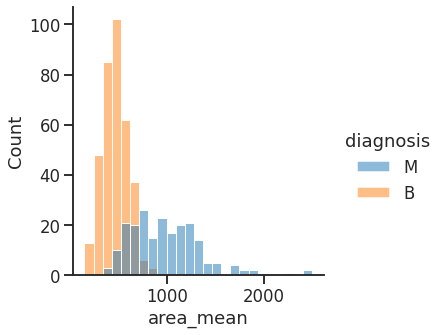

In [ ]:
### Graficamos la distribución de area
sns.displot(data1, x='area_mean', hue='diagnosis',kde=False,bins=25)

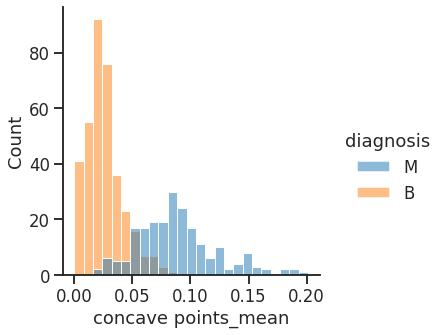

In [ ]:
### Graficamos la distribución de concave points_mean
sns.displot(data1, x='concave points_mean', hue='diagnosis',kde=False,bins=25)

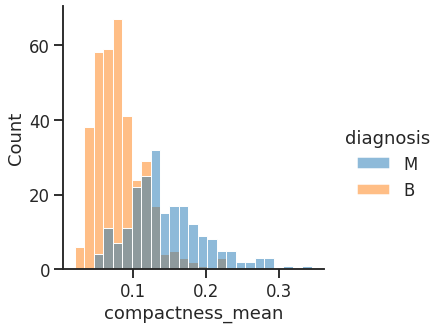

In [ ]:
### Graficamos la distribución de compactness_mean
sns.displot(data1, x='compactness_mean', hue='diagnosis',kde=False,bins=25)

In [ ]:
### Se aplica One-Hot-Encoding a 'Diagnosis'.
data1['Target']=pd.get_dummies(data1['diagnosis'],drop_first=True)

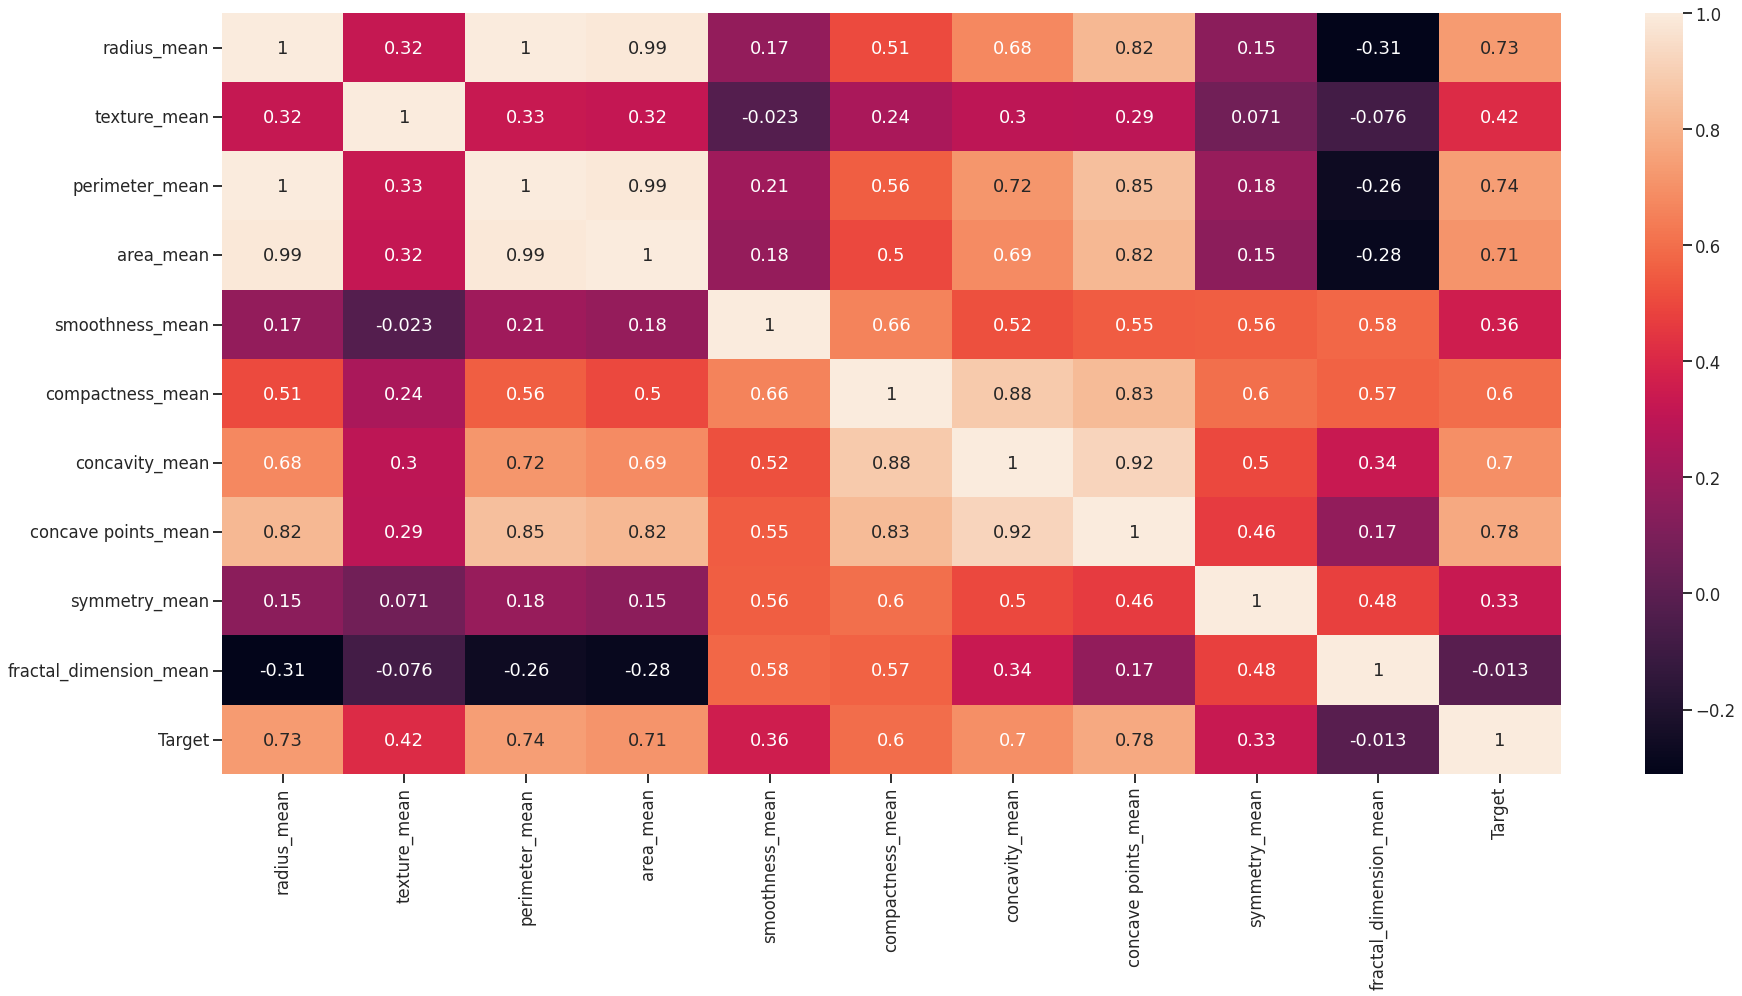

In [ ]:
### Se presenta la matriz de correlación representada en un mapa de calor. 
analisiscorr1 = data1.corr()
plt.figure(figsize=(30,14))
sns.heatmap(analisiscorr1,annot=True)

In [ ]:
### Correlación de todas las variables con la variable objetivo
analisiscorr1[['Target']].sort_values(by = 'Target',ascending = False).style.background_gradient()

In [ ]:
### Identificamos el numero de datos objetivo
data1.groupby('diagnosis')['diagnosis'].count()

diagnosis
B    357
M    212
Name: diagnosis, dtype: int64

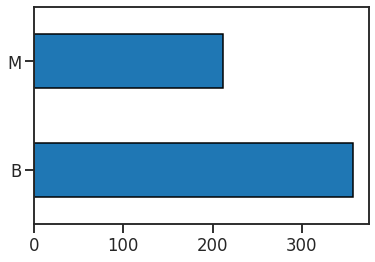

In [ ]:
### Graficamos los datos de la variable objetivo
data1['diagnosis'].value_counts().plot(kind='barh',edgecolor='black')


<h2> 3. Modelos de Aprendizaje <h2>

Se presenta a continuación varias alternativos de modelos de clasificación. Se elegirá el más adecuado basado en la metodología de validación cruzada k-fold.

Para los siguientes modelos, se tiene:

*Categoría a Predecir:* 'Diagnóstico' (O su equivalente en boleano 'Target')

*Variables Predictoras:* radius_mean,	texture_mean,	perimeter_mean,	area_mean,	smoothness_mean,	compactness_mean,	concavity_mean,	concave points_mean,	symmetry_mean,	fractal_dimension_mean

In [ ]:
data1

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  Target  
0           0.2419                 0.07871       1  
1           0.1812                 0.05667       1  
2           0.2069                 0.05999       1  
3           0.2597                 0.09744       1  
4           0.1809                 0.05883       1  
..             ...                     ...     ...  
564         0.1726                 0.05623       1  
565         0.1752                 0.05533       1  
566         0.1590                 0.05648       1  
567         0.2397                 0.07016       1  
568         0.1587                 0.05884       0  

[569 rows x 12 columns]

In [ ]:
data1.drop(['diagnosis'],axis=1,inplace=True)

In [ ]:
x=data1.drop(columns='Target',axis=1)
y=data1['Target']

Se realiza la partición de datos de entrenamiento y prueba en proporciones 70-30

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) # normalizar datos
x_test = scaler.transform(x_test)

### **3.1 Validación Cruzada - K Fold**

El modelo a implementar sigue una comportamiento de clasificación binaria con clases que presentan un nivel de desbalance 62.7% (clase 0) contra un 37.3% (clase 1). Por lo anterior, es importante evaluar el desempeño del modelo mediante métricas óptimas que muestren y evidencien el poder predictivo en la clasificación correcta de las clases a pesar del nivel de desbalanceo.

Ahora bien, la naturaleza del fenómeno a evaluar (detección del cáncer) dicta la imperancia de predecir correctamente todos los valores futuros, dado que los falsos negativos y los falsos positivos pueden ser igualmente perjudiciales para el tratamiento médico.

Por lo tanto, como métrica de desempeño principal se selecciona el **Accuracy**, la cual permite evaluar la tasa general de predicciones correctas en diagnósticos de cáncer.

**Metodología de Validación Cruzada:** Se empleará la metodología K-fold con 10 particiones o pliegues.

In [ ]:
### Se selecciona para todos los modelos la presición o accuracy dado que todos los modelos del caso son modelos de clasificación
kf = KFold(n_splits=10) ### Se definen 10 folders para validación cruzada

###**3.2 Regresión Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression
### Modelo de regresión logística
regresion_logistica = LogisticRegression()
regresion_logistica.fit(x_train, y_train)
scoresreglo = cross_val_score(regresion_logistica, x_train, y_train, cv=kf, scoring="accuracy")

###**3.3 Árboles de Clasificación**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
### Árbol de clasificación
arbol_clasificacion = DecisionTreeClassifier()

arbol_clasificacion.fit(x_train, y_train)
scorestree1 = cross_val_score(arbol_clasificacion, x_train, y_train, cv=kf, scoring="accuracy")

###**3.4 Naive Bayes con Kernel Gaussiano**

In [ ]:
from sklearn.naive_bayes import GaussianNB 
### Modelo de Naive Bayes
classifier_NB = GaussianNB()

classifier_NB.fit(x_train, y_train)
scoresgauss = cross_val_score(classifier_NB, x_train, y_train, cv=kf, scoring="accuracy")

###**3.5 Clasificación con kNN**

([<matplotlib.axis.XTick at 0x7f902fab79d0>,
 <a list of 5 Text major ticklabel objects>)

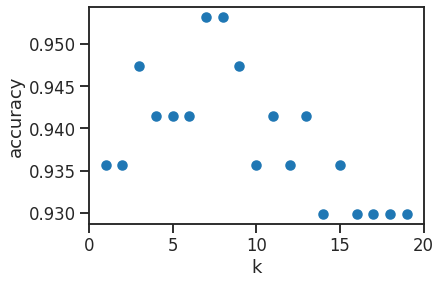

In [ ]:
#Identificamos el mejor valor de k
k_range= range(1,20)
scores = []
for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors = k)
    knn2.fit(x_train, y_train)
    scores.append(knn2.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
## El k con mejor accuracy es 8

In [ ]:
# se definen 8 grupos para knn y 10 folders para validación cruzada
# Modelo KNN
n_neighbors = 8
kf = KFold(n_splits=10)
knn2 = KNeighborsClassifier(n_neighbors)
knn2.fit(x_train, y_train)
scoresknn1 = cross_val_score(knn2, x_train, y_train, cv=kf, scoring="accuracy")
 

###**3.6 Evaluación de Métrica de Desempeño para Validación Cruzada**

In [ ]:
#Metricas modelo de regresión logistica
print("Metricas Accuracy cross_validation", scoresreglo)  
print("Media Accuracy de cross_validation", scoresreglo.mean())

Metricas Accuracy cross_validation [0.85       0.95       0.925      0.975      0.95       0.925
 0.95       0.925      0.94871795 0.8974359 ]
Media Accuracy de cross_validation 0.9296153846153846


In [ ]:
#Metricas modelo arbol de clasificación
print("Metricas Accuracy cross_validation", scorestree1)  
print("Media Accuracy de cross_validation", scorestree1.mean())

Metricas Accuracy cross_validation [0.825      0.925      0.9        0.9        0.925      0.975
 0.925      0.9        0.87179487 0.94871795]
Media Accuracy de cross_validation 0.9095512820512821


In [ ]:
#Metricas modelo naive bayes
print("Metricas Accuracy cross_validation", scoresgauss)  
print("Media Accuracy de cross_validation", scoresgauss.mean())

Metricas Accuracy cross_validation [0.825      0.925      0.925      0.95       0.9        0.925
 0.95       0.925      0.8974359  0.92307692]
Media Accuracy de cross_validation 0.914551282051282


In [ ]:
#Metricas modelo KNN
print("Metricas Accuracy cross_validation", scoresknn1)
print("Media Accuracy de cross_validation", scoresknn1.mean())

Metricas Accuracy cross_validation [0.825      0.95       0.975      0.975      0.975      0.975
 0.925      0.95       0.94871795 0.94871795]
Media Accuracy de cross_validation 0.9447435897435896


Evaluando los resultados de la métrica de desempeño definida, accuracy, se concluye que el modelo óptimo es **Clasificación kNN**

---
## **4. Balanceo de datos: Undersampling Y Oversampling**

Con el fin de verificar si los resutados anteriormente expuestos cambian sensiblemente a procesos previos de balanceo de datos, tales como undersampling y Oversampling, se replica el ejercicio anterior con un conjunto de datos corregido.

In [ ]:
### Se importan las librerías requeridas
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 
### Se declara una matriz de variables predictoras X con corrección Undersampling
X_resampled_under, y_resampled_under = RandomUnderSampler().fit_resample(x, y)
print(sorted(Counter(y_resampled_under).items()))

[(0, 212), (1, 212)]


In [ ]:
### Particionando en sectores Entrenamiento y Prueba
x_train_und,x_test_und,y_train_und,y_test_und=train_test_split(X_resampled_under,y_resampled_under,test_size=0.3,random_state=2)
### Normalizando Datos
x_train_und = scaler.fit_transform(x_train_und)
x_test_und = scaler.transform(x_test_und)

In [ ]:
### Modelo de knn datos undersampled
knn2.fit(x_train_und, y_train_und)
scoresknnunder = cross_val_score(knn2, x_train_und, y_train_und, cv=kf, scoring="accuracy")

In [ ]:
### Metricas modelo knn datos undersampled
print("Metricas Accuracy cross_validation", scoresknnunder)  
print("Media Accuracy de cross_validation", scoresknnunder.mean())

Metricas Accuracy cross_validation [0.86666667 0.93333333 0.96666667 0.9        0.9        0.96666667
 1.         0.89655172 0.93103448 0.86206897]
Media Accuracy de cross_validation 0.9222988505747127


In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled_over, y_resampled_over = SMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled_over).items()))

[(0, 357), (1, 357)]


In [ ]:
### Particionando en sectores Entrenamiento y Prueba
x_train_over,x_test_over,y_train_over,y_test_over=train_test_split(X_resampled_over,y_resampled_over,test_size=0.3,random_state=2)
### Normalizando Datos
x_train_over = scaler.fit_transform(x_train_over)
x_test_over = scaler.transform(x_test_over)

In [ ]:
### Modelo kNN datos oversampled
knn2.fit(x_train_over, y_train_over)
scoresknnover = cross_val_score(knn2, x_train_over, y_train_over, cv=kf, scoring="accuracy")

In [ ]:
### Metricas modelo de regresión logistica
print("Metricas Accuracy cross_validation", scoresknnover)  
print("Media Accuracy de cross_validation", scoresknnover.mean())

Metricas Accuracy cross_validation [0.96       0.96       1.         0.94       0.92       0.96
 0.98       0.92       0.96       0.93877551]
Media Accuracy de cross_validation 0.953877551020408


In [ ]:
print('Accuracy de KNN del set de Entrenamiento: {:.2f}'
     .format(knn2.score(x_train_over, y_train_over)))
print('Accuracy de KNN del set de prueba: {:.2f}'
     .format(knn2.score(x_test_over, y_test_over)))

Accuracy de KNN del set de Entrenamiento: 0.97
Accuracy de KNN del set de prueba: 0.91


In [ ]:
### Validación de predicciones
from sklearn.metrics import classification_report
pred = knn2.predict(x_test_over)
print(confusion_matrix(y_test_over, pred))
print(classification_report(y_test_over, pred))

[[ 95  13]
 [  7 100]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       108
           1       0.88      0.93      0.91       107

    accuracy                           0.91       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215



---
## 5.Clusterización con kNN

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data1.drop(['Target'],axis=1,inplace=True)

In [ ]:
#Se realiza un escalamiento de los datos
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado_prom = min_max_scaler.fit_transform(data1)
df_escalado_prom = pd.DataFrame(df_escalado_prom)
df_escalado_prom = df_escalado_prom.rename(columns = {0: 'radius_mean', 1:'texture_mean',2:'perimeter_mean',3:'area_mean',4:'smoothness_mean',5:'compactness_mean',
                                                      6:'concavity_mean',7:'concave points_mean',8:'symmetry_mean',9:'fractal_dimension_mean'})
df_escalado_prom.head(2)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   

   fractal_dimension_mean  
0                0.605518  
1                0.141323

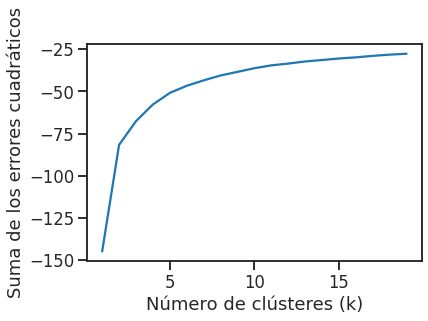

In [ ]:
### Se usa el metodo del codo para escoger el valor de k
nc = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado_prom).score(df_escalado_prom) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)
### Se elige el k=5 como hiperparámetro óptimo

In [ ]:
### Se calculan los centroides de cada cluster
kmeans = KMeans(n_clusters=5).fit(df_escalado_prom)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(df_escalado_prom)
centroids

array([[0.53407286, 0.39863577, 0.52381285, 0.38513797, 0.39598247,
        0.30304498, 0.31004058, 0.39242524, 0.38379003, 0.16633655],
       [0.28243638, 0.30976724, 0.27041455, 0.16216098, 0.29247241,
        0.13729863, 0.08128628, 0.10977909, 0.29206909, 0.18454105],
       [0.68482891, 0.42967535, 0.69495888, 0.54993637, 0.51849779,
        0.5586007 , 0.61911903, 0.69616178, 0.51069444, 0.31478517],
       [0.20649533, 0.25845955, 0.20342398, 0.10928262, 0.44719115,
        0.23307228, 0.1260585 , 0.15000955, 0.3997759 , 0.35647913],
       [0.33566043, 0.3509378 , 0.34562281, 0.20326421, 0.53988931,
        0.49521738, 0.4252325 , 0.41411378, 0.54095571, 0.48270689]])

### 5.1 Reducción de Dimensionalidad con PCA para Visualización en 3D

In [ ]:
#Se ejecuta el PCA a 3 componentes
pca = PCA(n_components=3)
Xr1 = pca.fit(df_escalado_prom).transform(df_escalado_prom)
dataa = pd.DataFrame(Xr1)
dataa['labels']= labels

In [ ]:
dataa

0         1         2  labels
0    0.890090  0.510925 -0.333154       2
1    0.303808 -0.394242 -0.146261       0
2    0.677350 -0.076572 -0.044737       2
3    0.533106  1.050705  0.091278       4
4    0.563012 -0.198962 -0.264869       0
..        ...       ...       ...     ...
564  0.782043 -0.292377 -0.050944       2
565  0.492892 -0.351715  0.181668       0
566  0.122124 -0.283696  0.257756       0
567  1.153696  0.237167  0.238981       2
568 -0.627703 -0.096434  0.305472       1

[569 rows x 4 columns]

In [ ]:
dataa = dataa.rename(columns = {0: 'x', 1:'y',2:'z'})

In [ ]:
xpca = dataa['x'].values
zpca = dataa['y'].values
ypca = dataa['z'].values

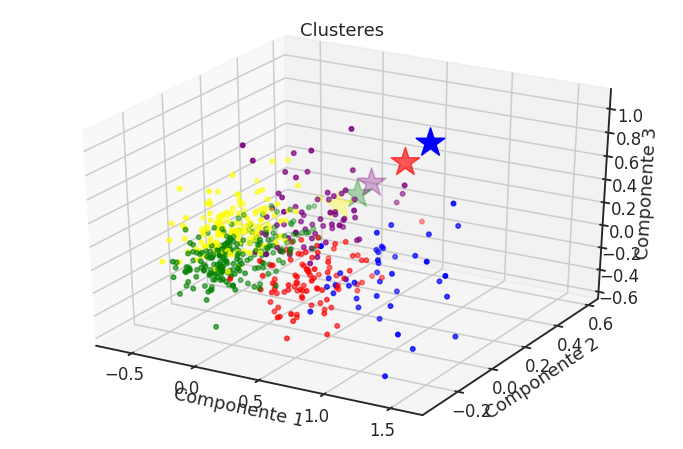

In [ ]:
#Se grafican los clusteres en 3 dimensiones
colores=['red','green','blue','yellow','purple']
asignar=[]

for row in labels:
     asignar.append(colores[row])

fig=plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter3D(xpca, ypca, zpca, c=asignar)
ax.scatter3D(centroids[:, 0], centroids[:, 1],centroids[:, 2], marker = '*',c=['red','green','blue','yellow','purple'],s=900)
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
plt.title('Clusteres')
plt.show()

### 5.2 Reducción de Dimensionalidad con PCA para Visualización 2D

In [ ]:
#Se ejecuta el PCA a 2 componentes
pca2 = PCA(n_components=2)
Xr2 = pca2.fit(df_escalado_prom).transform(df_escalado_prom)
dataa2 = pd.DataFrame(Xr2)
dataa2['labels'] = labels

In [ ]:
dataa2

0         1  labels
0    0.890090  0.510925       2
1    0.303808 -0.394242       0
2    0.677350 -0.076572       2
3    0.533106  1.050705       4
4    0.563012 -0.198962       0
..        ...       ...     ...
564  0.782043 -0.292377       2
565  0.492892 -0.351715       0
566  0.122124 -0.283696       0
567  1.153696  0.237167       2
568 -0.627703 -0.096434       1

[569 rows x 3 columns]

Text(0.5, 1.0, 'Clusteres')

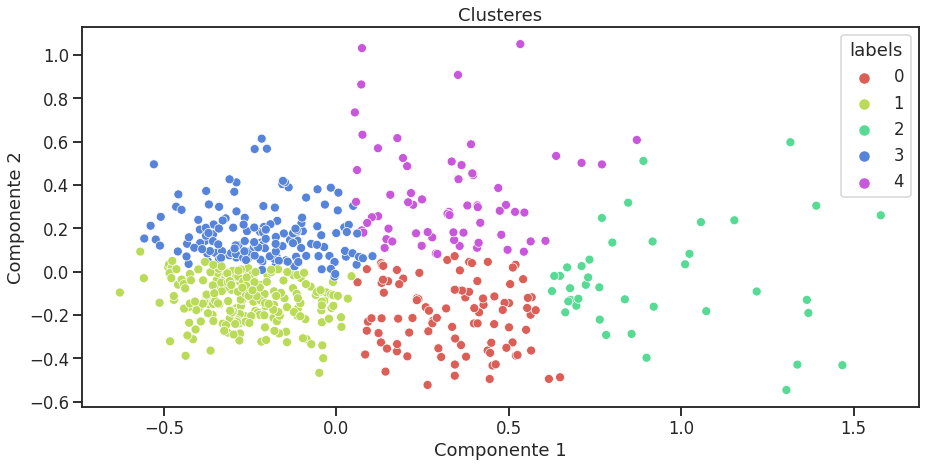

In [ ]:
#Se grafican los clusteres en 2 dimensiones
plt.figure(figsize=(15,7))
sns.scatterplot(data=dataa2, x=0, y=1, hue='labels',palette = sns.color_palette('hls',5))
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title('Clusteres')

En el modelo de K-NN la validación cruzada indica una buena capacidad de generalización
del modelo, su uso en este caso sugiere que el modelo K-NN es robusto y puede clasificar
correctamente los casos incluso cuando se evalúa en diferentes subconjuntos del conjunto de
datos.
Por otro lado, el método de clusterización fue realizado con el método kNN con 5 grupos
óptimos. Tales se presentan visualmente en dos y tres dimensiones, usando el método de
reducción dimensional PCA.
Estos grupos indican relaciones de similitud suficientemente robustas permitiendo agrupar
los pacientes en 5 conjuntos. Tales conjuntos de pacientes poseen características médicas
similares, cuya segmentación puede mejorar las capacidades de diagnóstico y tratamiento del
cuerpo oncológico, aumentando las posibilidades del éxito médico.